# 데이터 준비

In [20]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob

# 시각화 

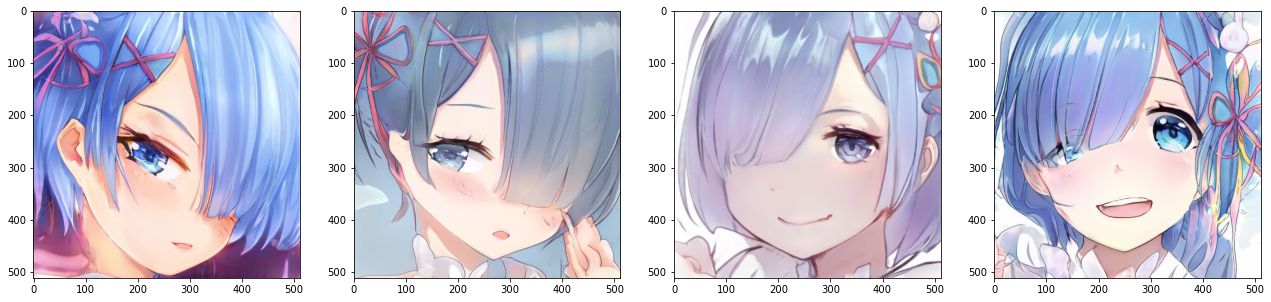

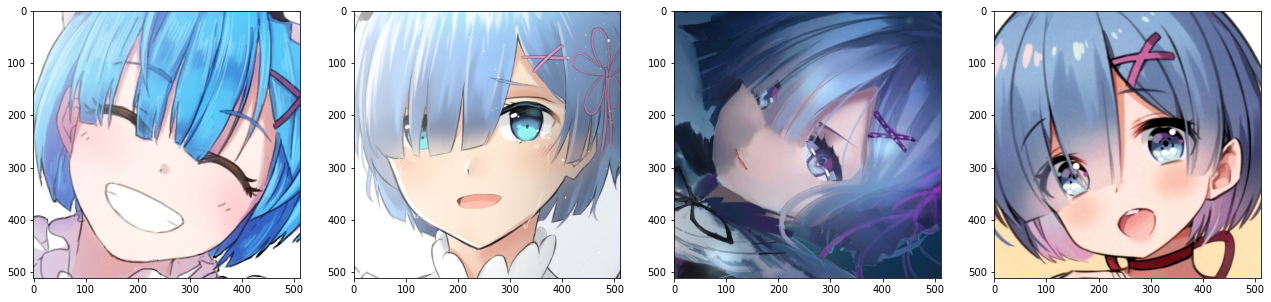

In [77]:
rem_fakes =glob.glob('data/rem/rem_fakes/*.png')

figure, axes = plt.subplots(figsize=(22, 10), nrows=1, ncols=4)

rem_filepaths = rem_fakes[:4]

for i in range(4):
    rem_image = cv2.cvtColor(cv2.imread(rem_filepaths[i]), cv2.COLOR_BGR2RGB)
    axes[i].imshow(rem_image)

prettyrem =glob.glob('data/rem/rem_preprocessed_512/*.jpg')

figure, axes = plt.subplots(figsize=(22, 10), nrows=1, ncols=4)

rem_filepaths = prettyrem[:4]

for i in range(4):
    rem_image = cv2.cvtColor(cv2.imread(rem_filepaths[i]), cv2.COLOR_BGR2RGB)
    axes[i].imshow(rem_image)

# 훈련/검증/테스트 데이터 분리

In [47]:
train_dataset = keras.utils.image_dataset_from_directory(
    "data/rem", 
    image_size=(224,224),
    label_mode="binary",
    batch_size=32,
    shuffle=True,
    seed=1,
    subset="training",
    validation_split=0.2
)

validation_dataset = keras.utils.image_dataset_from_directory(
    "data/rem", 
    image_size=(224,224),
    label_mode="binary",
    batch_size=32,
    shuffle=True,
    seed=1,
    subset="validation",
    validation_split=0.2, 
)

train_dataset = train_dataset.cache().prefetch(1)
validation_dataset = validation_dataset.cache().prefetch(1)

Found 1725 files belonging to 2 classes.
Using 1380 files for training.
Found 1725 files belonging to 2 classes.
Using 345 files for validation.


# 데이터셋 클래스 정의

In [26]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image

base = MobileNetV2(weights='imagenet', include_top=False)
base.trainable = False

model = keras.Sequential([
    layers.Rescaling(scale=1.0 / 255.0, offset=-1),
    base,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(1, activation="sigmoid")
])

9406464/9406464 [==============================] - 1s 0us/step


# 모델 훈련 및 성능 검증

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

callbacks = [
	EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True),
	ReduceLROnPlateau(monitor='val_loss', min_lr=1e-7, patience=2, mode='min', verbose=1, factor=0.1),
	ModelCheckpoint(monitor='val_loss', filepath='./best_model.h5', save_best_only=True)
]

model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    loss = keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"]
)

model.fit(train_dataset, epochs=50,
					callbacks=callbacks, validation_data=validation_dataset)

Epoch 1/50
44/44 [==============================] - 97s 2s/step - loss: 0.6996 - accuracy: 0.5971 - val_loss: 0.6380 - val_accuracy: 0.6522 - lr: 0.0010
Epoch 2/50
44/44 [==============================] - 90s 2s/step - loss: 0.6142 - accuracy: 0.6659 - val_loss: 0.5967 - val_accuracy: 0.6870 - lr: 0.0010
Epoch 3/50
44/44 [==============================] - 83s 2s/step - loss: 0.5765 - accuracy: 0.6913 - val_loss: 0.6023 - val_accuracy: 0.6928 - lr: 0.0010
Epoch 4/50
44/44 [==============================] - 82s 2s/step - loss: 0.5636 - accuracy: 0.6993 - val_loss: 0.5799 - val_accuracy: 0.7101 - lr: 0.0010
Epoch 5/50
44/44 [==============================] - 85s 2s/step - loss: 0.5462 - accuracy: 0.7290 - val_loss: 0.5492 - val_accuracy: 0.7188 - lr: 0.0010
Epoch 6/50
44/44 [==============================] - 81s 2s/step - loss: 0.5146 - accuracy: 0.7551 - val_loss: 0.5489 - val_accuracy: 0.7188 - lr: 0.0010
Epoch 7/50
44/44 [==============================] - 79s 2s/step - loss: 0.5145 - a

- 데이터셋 클래스 정의(자체 제공, 나만의 데이터셋)

- 이미지 변환기(torchvision, albumentation, 나만의 전처리기)

- 데이터셋 생성/데이터로더 생성

# 2.모델 생성

- "나만의 CNN 모델" 만들기 or "이미 학습된 모델" 활용 가능

- 손실함수, 옵티마이저, 학습률, 학습 스케쥴러 설정

# 3.모델 훈련 및 성능 검증

# 4. 질문 답변 작성하기 (성능 개선 과정에 대해 자유롭게 작성)

Q1) 어떤 옵티마이저, 로스 함수를 사용했는지?

Q2) 처음 시도했던 Network Architecture는 어떤 종류인지?

Q3) 이후 시도해봤던 Network 들은 무엇인지?

Q4) 과대적합을 피하기 위해 했던 작업들은 무엇인지?

Q5) 중요 하이퍼파라미터 어떻게 설정했는지? 이유?